
# Гуреев Александр БПИ227. Математическая статистика. ИДЗ-1. Вариант 7

Импортируем библиотеки, которые потребуются для решения задач

In [29]:
!pip install --upgrade scipy
import scipy as sc
import numpy as nu
from math import *
import matplotlib.pyplot as plt
from typing import *
import random as r

## Зачада №1. Результаты измерения обхвата грудной клетки 120 женщин, см.

Данные хранятся в файле **`data.txt`**. Считаем данные из файла:

In [30]:
Selection = List[float]

# Считываем информацию из файла
with open("data.txt", encoding="UTF-8") as file:
    data = [int(el) for line in file.readlines() for el in line.strip().split()]

data: Selection = data

### Пункт 1. Постройте статистический ряд, предварительно определив число интервалов с помощью формулы Стерджесса

У нас есть выборка данных, состоящая из элементов \($x_1, x_2, \ldots, x_n$\).

Статистический ряд определяется как последовательность пар \($\epsilon_i, \hat{p_i})$\, где:
- \($\epsilon_i$\) - интервал или класс, содержащий значения из выборки,
- \($\hat{p_i}$\) - относительная частота появления значений из выборки в интервале \($\epsilon_i$\).

Относительная частота \($\hat{p_i}$\) для каждого интервала \($\epsilon_i$\) вычисляется по формуле:

\$
\hat{p_i} = \frac{1}{n} \sum_{i=1}^{n}I(x_i \in \epsilon_i)
$\
Где:
- \$I(x_i \in \epsilon_i)\$ - индикаторная функция, которая равна 1, если значение \$(x_i\$) попадает в интервал \$(\epsilon_i\$), и 0 в противном случае.

Построим статистический ряд:

In [31]:
Interval = Tuple[float, float]
StatSeries = List[Tuple[Interval, float]]

# Функция для определения оптимального количества интервалов по правилу Стерджесса
def sturges_rule(selection: Selection) -> int:
    N = len(selection)
    return 1 + floor(log2(N))

# Функция для генерации интервалов статистического ряда
def generate_intervals(data: Selection, intervals_count: int) -> List[Interval]:
    # Генерируем равномерно распределенные интервалы на основе минимального и максимального значения данных
    interval_boundaries = nu.linspace(min(data), max(data), intervals_count + 1)
    return list(zip(interval_boundaries, interval_boundaries[1:]))

# Функция для проверки принадлежности значения интервалу
def is_in_interval(x: float, interval: Interval, inclusive_right: bool = False) -> bool:
    return (interval[0] <= x <= interval[1]) if inclusive_right else (interval[0] <= x < interval[1])

# Функция для построения статистического ряда
def build_statistical_series(data: Selection, intervals: List[Interval]) -> StatSeries:
    # Вычисляем частоту попадания значений в каждый интервал
    stat_series = [(interval, sum([is_in_interval(x, interval, i+1 == len(intervals)) for x in data])/len(data)) for i, interval in enumerate(intervals)]
    return stat_series

intervals_count = sturges_rule(data)
intervals = generate_intervals(data, intervals_count)
stat_series = build_statistical_series(data, intervals)

print("Статистический ряд:")
for interval, frequency in stat_series:
    print(f"Интервал: {interval}, Частота: {frequency}")

Статистический ряд:
Интервал: (89.0, 91.85714285714286), Частота: 0.10833333333333334
Интервал: (91.85714285714286, 94.71428571428571), Частота: 0.19166666666666668
Интервал: (94.71428571428571, 97.57142857142857), Частота: 0.275
Интервал: (97.57142857142857, 100.42857142857143), Частота: 0.23333333333333334
Интервал: (100.42857142857143, 103.28571428571429), Частота: 0.10833333333333334
Интервал: (103.28571428571429, 106.14285714285714), Частота: 0.058333333333333334
Интервал: (106.14285714285714, 109.0), Частота: 0.025


### Пункт 2. Постройте гистограмму

Гистограмма строится почти так же, как и статистический ряд. Однако она включает дополнительные интервалы на краях, от минус бесконечности до первой порядковой статистики и от последней порядковой статистики до плюс бесконечности. Высота каждого столбца гистограммы вычисляется по формуле:

$\ h_i = \frac{\hat{p_i}}{\Delta}\ $

где \$ \hat{p_i} \$ - относительная частота попадания значений в интервал \$  \epsilon_i \$ из статистического ряда, а \$ \Delta \$ - ширина каждого интервала гистограммы, равная:

$\ \Delta = \frac{x_{(n)} - x_{(1)}}{m} \$

где:
- $\ x_{(n)} $ - максимальное значение в выборке,
- $\ x_{(1)} $ - минимальное значение в выборке,
- $\ m $ - количество интервалов.

Получается, что каждый столбец гистограммы представляет собой относительную частоту попадания значений в соответствующий интервал статистического ряда, нормированную на ширину интервала гистограммы.


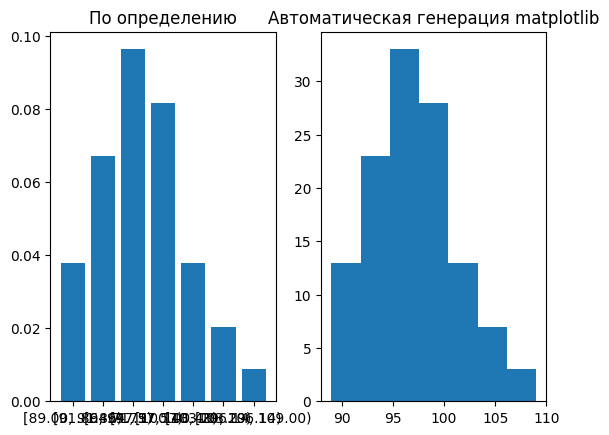

In [32]:
gist_delta = (max(data) - min(data)) / intervals_count

# Функция для форматирования интервалов
def format_interval(interval: Interval, decimals: int = 2) -> str:
    return f"[{interval[0]:.{decimals}f}, {interval[1]:.{decimals}f})"

# Построение гистограмм
fig, [ax1, ax2] = plt.subplots(1, 2)
# Левый график с пользовательским представлением интервалов
ax1.bar([format_interval(s[0]) for s in stat_series], [s[1] / gist_delta for s in stat_series])
ax1.set_title('По определению')
# Правый график с использованием автоматически генерируемой гистограммы matplotlib
ax2.hist(data, intervals_count)
ax2.set_title('Автоматическая генерация matplotlib')

plt.show()

Смотрим на графики и делаем вывод, что написанный алгоритм работает правильно.

### Пункт 3. Найдите значения точечных оценок математического ожидания и дисперсии

1. **Точечная оценка математического ожидания**:
   
   Оценка математического ожидания, обозначаемая как $\ \hat{m}$ или $\ \overline{X} $\, вычисляется как среднее значение выборки $\ x_1, x_2, \ldots, x_n $\:

   $\ \hat{m} = \overline{X} = \frac{1}{n} \sum_{i=1}^n x_i $

   Где:
   - $\ n $ - количество наблюдений в выборке,
   - $\ x_i $ - каждое наблюдение в выборке.



In [33]:
# Вычисляем точечное мат. ожидание
expected_value = sc.stats.tmean(data)
print(f'Мат. ожидание = {expected_value}')

Мат. ожидание = 96.98333333333333


2. **Точечная оценка дисперсии**:
   
   Оценка дисперсии, обозначаемая как $\ \hat{\sigma^2} $ или $\ s^2 $\, вычисляется как среднее квадратичное отклонение каждого наблюдения от среднего:

   \$ \hat{\sigma^2} = s^2 = \frac{1}{n} \sum_{i=1}^n (x_i - \hat{m})^2 $

   Где:
   - $\ n $ - количество наблюдений в выборке,
   - $\ x_i $ - каждое наблюдение в выборке,
   - $\ \hat{m} $ - оценка математического ожидания (выборочное среднее).

In [34]:
# Вычисляем точечную дисперсию
variance = sc.stats.tvar(data)
print(f'Дисперсия = {variance}')

Дисперсия = 19.10896358543417


### Пункт 4. На основе анализа результатов наблюдений выдвинете гипотезу о виде закона распределения наблюдаемой случайной величины

Исходя из схожести формы гистограммы с функцией плотности нормального распределения, мы можем выдвинуть следующую гипотезу:

- Нулевая гипотеза $\ H_0 $ предполагает, что случайная величина имеет нормальное распределение $\ N(m, \sigma^2) $\, где $\ m $ - среднее значение и $\ \sigma^2 $ - дисперсия.

- Альтернативная гипотеза $\ H_a $ утверждает, что случайная величина имеет другое распределение.


### Пункт 5. С помощью критерия хи-квадрат проверьте гипотезу, сформулированную в [п.4](#Пункт-4.-На-основе-анализа-результатов-наблюдений-выдвинете-гипотезу-о-виде-закона-распределения-наблюдаемой-случайной-величины)


Для проверки гипотезы с использованием критерия хи-квадрат использую следующие шаги:

1. **Подготовка данных**: Разбиваем наблюдаемый диапазон значений на интервалы и подсчитываем количество наблюдений в каждом интервале.

2. **Оценка параметров**: Оцениваем параметры нормального распределения (среднее $\ m $ и дисперсию$\ \sigma^2 $) на основе имеющихся данных.

3. **Оценка ожидаемых частот**: Для каждого интервала вычисляем ожидаемую частоту $\ p_k' $ на основе предполагаемого нормального распределения.

4. **Вычисление статистики хи-квадрат**: Вычисляем значение статистики хи-квадрат по формуле:

  $ \hat\chi^2 = \sum_{k=1}^m \frac{n}{p_k'}\left(\frac{n_k}{n}-p_k'\right)^2 $

где $n_k$ - кол-во наблюдений в $k$-ом  интервале, $n$ - общее кол-во наблюдений.
5. **Определение критической области**: Определяем критическую область для заданного уровня значимости $\ \alpha $ и количества степеней свободы $\ m-1$ .

6. **Принятие решения**: Сравниваем значение статистики хи-квадрат с критической областью и делаем вывод о принятии или отвержении нулевой гипотезы о нормальном распределении данных.

7. **Интерпретация результатов**: Анализируем результаты теста и делаем вывод о подтверждении или отвержении гипотезы о нормальном распределении данных.


In [35]:
def normal_distribution_function(x: float) -> float:
    # Кумулятивная функция распределения нормального распределения
    return sc.stats.norm.cdf(x, loc=expected_value, scale=(variance**0.5))

def interval_probability(interval : Interval) -> float:
    # Вероятность попадания случайной величины в интервал
    return normal_distribution_function(interval[1]) - normal_distribution_function(interval[0])

# Вычисление статистики хи-квадрат
n = len(data)
significance_level = 0.05
chi2_statistic = sum([n/interval_probability(interval) * ((relative_frequency - interval_probability(interval)) ** 2) for interval, relative_frequency in stat_series])

# Определение критической области
degrees_of_freedom = len(stat_series) - 1
critical_value = sc.stats.chi2.ppf(1 - significance_level, degrees_of_freedom)

# Hypothesis testing
if chi2_statistic < critical_value:
    print(f"Нулевая гипотеза не противоречит данным на уровне значимости {1 - significance_level}")
else:
    print(f"Альтернативная гипотеза вероятнее, чем нулевая, на уровне значимости {1 - significance_level}")

Нулевая гипотеза не противоречит данным на уровне значимости 0.95


### Пункт 6. Предполагая, что выборка порождена гауссовской случайной величиной, постройте доверительные интервалы уровня надёжности 0.95 для математического ожидания и дисперсии наблюдаемой случайной величины.

Рассмотрим доверительный интервал для математического ожидания $\ m $  гауссовской случайной величины на основе теоремы Фишера.

1. **Доверительный интервал для математического ожидания**:

    Согласно теореме Фишера, случайная величина
    $\ \sqrt{n-1} \cdot \frac{(\hat{m} - m)}{s} $\
    распределена по $\ t $-распределению с $\ n-1 $ степенями свободы.

    Таким образом, доверительный интервал для математического ожидания с уровнем доверия $\ 1-\alpha $ можно выразить как:
    $\ \hat{m} - \frac{s}{\sqrt{n-1}} \cdot t\left(1-\frac{\alpha}{2}; n-1\right) < m < \hat{m} + \frac{s}{\sqrt{n-1}} \cdot t\left(1-\frac{\alpha}{2}; n-1\right) $




In [36]:
# Рассчитываем доверительные интервалы для математического ожидания и дисперсии

# Доверительный интервал для математического ожидания
mean_additive = (variance ** 0.5) / ((n - 1) ** 0.5) * sc.stats.t.ppf(1 - significance_level / 2, n - 1)
mean_confidence_interval: Interval = (expected_value - mean_additive, expected_value + mean_additive)

# Выводим результаты
print(f"Доверительный интервал уровня надежности {1 - significance_level} для математического ожидания: {mean_confidence_interval}")

Доверительный интервал уровня надежности 0.95 для математического ожидания: (96.18986028025452, 97.77680638641215)


Рассмотрим доверительный интервал для дисперсии $\ \sigma^2 $ гауссовской случайной величины на основе теоремы Фишера
2. **Доверительный интервал для дисперсии**:

    Согласно теореме Фишера, случайная величина
    $\ \frac{n \cdot s^2}{\sigma^2} $
    распределена по хи-квадрат распределению с $\ n-1 $ степенями свободы.

    Таким образом, доверительный интервал для дисперсии с уровнем доверия $\ 1-\alpha $ можно выразить как:
    $\ \sqrt{\frac{n \cdot s^2}{\chi^2\left(1-\frac{\alpha}{2}; n-1\right)}} < \sigma < \sqrt{\frac{n \cdot s^2}{\chi^2\left(\frac{\alpha}{2}; n-1\right)}} $



In [37]:
# Доверительный интервал для дисперсии
chi_square_left = sc.stats.chi2.ppf(1 - significance_level / 2, n - 1)
chi_square_right = sc.stats.chi2.ppf(significance_level / 2, n - 1)
variance_confidence_interval: Interval = ((n * variance / chi_square_left) ** 0.5, (n * variance / chi_square_right) ** 0.5)

# Выводим результаты
print(f"Доверительный интервал уровня надежности {1 - significance_level} для дисперсии: {variance_confidence_interval}")

Доверительный интервал уровня надежности 0.95 для дисперсии: (3.895824186795533, 5.028130437847809)


## Задача №2.
Сгенерируйте выборку объёма 50 из распределения $F(x)$, соответствующего вашему
варианту. Постройте гистограмму с 6 столбцами для полученной выборки. Сгенерируйте выборку объёма 500 из того же распределения и постройте гистограмму с 10 столбцами для неё. Опишите метод моделирования выборки соответствующей распределению $F(x)$.
Применяя критерий хи-квадрат для простой гипотезы, проверьте гипотезу о том, что
выборки объёма 50 и 500 соответствуют сгенерированному распределению. По большой
и малой выборкам проверьте гипотезу о том, что математическое ожидание наблюдаемой СВ равно $m_0$. Проведите сравнение полученных результатов. Если имеются различия, попытайтесь их описать и объяснить.

По условию нам дано экспоненциальное распределение:
$$F(x) = \begin{cases}
      0 & \text{при } x < 0 \\
      1 - e^{-\lambda x} & \text{при } x \geq 0
   \end{cases}
$$
с параметром $\lambda = 2$ и мат. ожидание СВ: $m_0 = 0.5$  
Подставим параметр 2:
$$F(x) = \begin{cases}
      0 & \text{при } x < 0 \\
      1 - e^{-2x} & \text{при } x \geq 0
   \end{cases}
$$

In [38]:
# Инициализация параметра
lambda_val = 2

# Функция распределения F(x)
def myF(x: float) -> float:
    if x < 0:
        return 0
    return 1 - pow(e, - lambda_val * x)

# Обратная функция распределения F^{-1}(x)
def inverted_myF(p: float) -> float:
    match p:
        case 0:
            return 0
        case 1:
            raise ValueError(f'p={p} должно находиться в диапазоне (0, 1)')
        case _ if not 0 < p < 1:
            raise ValueError(f'p={p} должно находиться в диапазоне (0, 1)')
        case _:
            return -log(1 - p) / lambda_val

# Генерация данных
def generate_data(size: int) -> Selection:
    return [inverted_myF(r.random()) for _ in range(size)]

Так как нам известна функция распределения СВ, можно получить выборку.

Сгенерируем выборку объёма 50 и построим гистограмму с 6 столбцами для полученной выборки, а также построим гистограмму для выборки объема 500 с 10 столбцами :

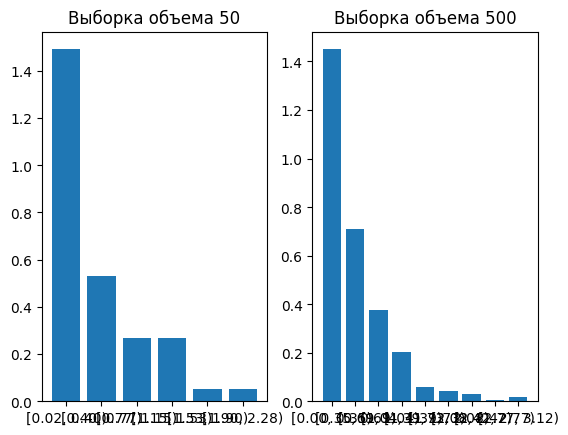

In [48]:
# Генерируем выборку объема 50
data_50: Selection = generate_data(50)
# Генерируем выборку объема 500
data_500: Selection = generate_data(500)

# Мат. ожидание
m0 = 0.5

# Старое решение (или же можно использовать для сверки...)
'''
# Строим две гистограммы
fig, [ax1, ax2] = plt.subplots(1,2)
ax1.hist(data_50, 6)
ax1.set_title('Выборка объема 50')
ax2.hist(data_500, 10)
ax2.set_title('Выборка объема 500')

plt.show()
'''
# Данные для выборки размером 50
intervals_count_50 = sturges_rule(data_50)
intervals_50 = generate_intervals(data_50, intervals_count_50)
stat_series_50 = build_statistical_series(data_50, intervals_50)
gist_delta_50 = (max(data_50) - min(data_50)) / intervals_count_50

fig, [ax1, ax2] = plt.subplots(1, 2)
# Левый график с выборкой 50
ax1.bar([format_interval(s[0]) for s in stat_series_50], [s[1] / gist_delta_50 for s in stat_series_50])
ax1.set_title('Выборка объема 50')

# Данные для выборки размером 500
intervals_count_500 = sturges_rule(data_500)
intervals_500 = generate_intervals(data_500, intervals_count_500)
stat_series_500 = build_statistical_series(data_500, intervals_500)
gist_delta_500 = (max(data_500) - min(data_500)) / intervals_count_500

# Правый график с выборкой 500
ax2.bar([format_interval(s[0]) for s in stat_series_500], [s[1] / gist_delta_500 for s in stat_series_500])
ax2.set_title('Выборка объема 500')

plt.show()

При помощи критерия хи-квадрат проверим, что выборки соответствует распределению F(x). Составим две гипотезы:

Гипотеза $H_0$ (нулевая гипотеза) состоит в том, что СВ имеет распределение $F(x)$. Это означает, что наблюдаемые данные хорошо соответствуют теоретической модели $F(x)$.

Альтернативная гипотеза $H_а$ заключается в том, что случайная величина имеет какое-то другое распределение, отличное от $F(x)$. Это означает, что наблюдаемые данные не соответствуют теоретической модели $F(x)$.


In [49]:
# Функция для создания интервалов статистического ряда
def P(interval: Interval) -> float:
  return myF(interval[1]) - myF(interval[0])

def create_intervals(data: Selection, num_intervals: int) -> list[Interval]:
    intervals = nu.linspace(min(data), max(data), num_intervals + 1)
    return list(zip(intervals, intervals[1:]))

# Функция для вычисления статистического ряда
def compute_statistical_series(data: Selection, intervals: list[Interval]) -> StatSeries:
    return [(interval, sum([is_in_interval(x, interval, i+1 == len(intervals)) for x in data])/len(data)) for i, interval in enumerate(intervals)]

# Функция для вычисления значения статистики хи-квадрат
def calculate_chi2(data: Selection, stat_series: StatSeries) -> float:
    return sum([len(data)/P(ss[0]) * ((ss[1] - P(ss[0])) ** 2) for ss in stat_series])

alpha = 0.05  # Уровень значимости
# Создание интервалов для двух наборов данных
intervals_50 = create_intervals(data_50, 6)
intervals_500 = create_intervals(data_500, 10)

# Вычисление статистического ряда для каждого набора данных
stat_series_50 = compute_statistical_series(data_50, intervals_50)
stat_series_500 = compute_statistical_series(data_500, intervals_500)

# Вычисление значений статистики хи-квадрат
chi2_eval50 = calculate_chi2(data_50, stat_series_50)
chi2_eval500 = calculate_chi2(data_500, stat_series_500)

# Определение критических значений статистики хи-квадрат для 1-ой и 2-о1 выборок
chi2_percent_50 = sc.stats.chi2.ppf(1 - alpha, len(stat_series_50) - 1)
chi2_percent_500 = sc.stats.chi2.ppf(1 - alpha, len(stat_series_500) - 1)

# Проверка попадания значений статистики хи-квадрат в доверительный интервал
print("Выборка объемом 50:")
if chi2_eval50 < chi2_percent_50:
    print(f"Гипотеза не противоречит настоящей, при уровне надежности {1 - alpha}")
else:
    print(f"Альтернативная гипотеза вероятнее, с уровнем надежности {1 - alpha}")

print("Выборка объемом 500:")
if chi2_eval500 < chi2_percent_500:
    print(f"Гипотеза не противоречит настоящей, при уровне надежности {1 - alpha}")
else:
    print(f"Альтернативная гипотеза вероятнее, с уровнем надежности {1 - alpha}")

Выборка объемом 50:
Гипотеза не противоречит настоящей, при уровне надежности 0.95
Выборка объемом 500:
Гипотеза не противоречит настоящей, при уровне надежности 0.95


Вычислим средне квадратическое отклонение $\sigma$ для наблюдаемой СВ.

Из функции распределения, через производную, находим функцию плотности:
$$F(x) = \begin{cases}
      0 & \text{при } x < 0 \\
      1 - e^{-2x} & \text{при } x \geq 0
   \end{cases}
$$
$\frac{d}{dx}(1 - e^{-2x}) = 2 \cdot e^{-2x}$, значит:
$$f(x) = \begin{cases}
      0 & \text{при } x < 0 \\
      2 \cdot e^{-2x} & \text{при } x \geq 0
   \end{cases}
$$

Так как по условию дано экспоненциальное распределение с параметром 2, а $\sigma^2 = \lambda^{-2}$, то:

$\sigma^{2} = \frac{1}{2^2} \Rightarrow \sigma = \sqrt{\frac{1}{4}} = \frac{1}{2} $

По большой и малой выборкам проверим гипотезу о том, что математическое ожидание наблюдаемой СВ равно $m_0$.

Гипотезы:
$H_0: m = m_0, H_a: m \ne m_0$

По центральной предельной теореме: $\frac{(\overline{X} - m_0)\sqrt{n}}{\sigma} \Big|_{H_0} = \frac{(\overline{X} - m)\sqrt{n}}{\sigma}\sim N(0,1)$.

Доверительная область: $(Z_{\alpha/2}, Z_{1-\alpha/2})$, Критическая область: $(-\infty, Z_{\alpha/2})\cup (Z_{1-\alpha/2}, +\infty)$

In [45]:
# Вычисление среднего для данных
mean_50 = sc.stats.tmean(data_50)
mean_500 = sc.stats.tmean(data_500)

# Оценка
sigma = 1 / 2  # Известное стандартное отклонение

eval_50 = ((mean_50 - m0) * (len(data_50) ** 0.5)) / sigma
eval_500 = ((mean_500 - m0) * (len(data_500) ** 0.5)) / sigma

# Определение критической области
z_left = sc.stats.norm.ppf(alpha / 2)
z_right = sc.stats.norm.ppf(1 - alpha / 2)

# Проверка гипотезы для выборки объема 50
print("Выборка объемом 50:")
if eval_50 >= z_left and eval_50 <= z_right:
    display(f"Гипотеза не противоречит данным, при уровне надежности {1 - alpha}")
else:
    display(f"Альтернативная гипотеза вероятнее, с уровнем надежности {1 - alpha}")

# Проверка гипотезы для выборки объема 500
print("Выборка объемом 500:")
if eval_500 >= z_left and eval_500 <= z_right:
    display(f"Гипотеза не противоречит данным, при уровне надежности {1 - alpha}")
else:
    display(f"Альтернативная гипотеза вероятнее, с уровнем надежности {1 - alpha}")


Выборка объемом 50:


'Гипотеза не противоречит данным, при уровне надежности 0.95'

Выборка объемом 500:


'Гипотеза не противоречит данным, при уровне надежности 0.95'

#### Вывод
Так как результат для обоих выборок показал, что гипотеза $H_0$ не противоречит данным при данном уровне надежности, то можно сделать вывод, что нет статистически значимых различий между средними значениями выборок и предполагаемым значением $m_0$ на этом уровне значимости.